# <div style="text-align: center;"> <span style="color: purple; font-weight: bold;">Capacity Prediction Of Global Power Plant Database - A Machine Learning Approach</span> </div> 

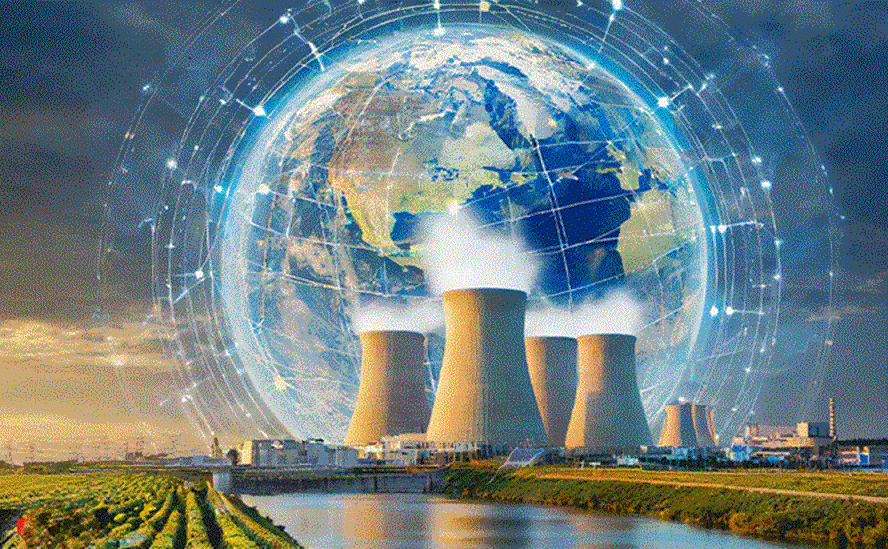

## 
---
**Name** : **ANJALI J**

**Organisation** : **ENTRI ELEVATE**

**Date** : **04-11-2024**

---


# Table of Contents

1. [Problem Statement](#1)
2. [Objective](#2)
3. [Data Description](#3)
4. [Data Collection](#4)
5. [Exploratory Data Analysis(EDA)](#5)
6. [Data Preprocessing](#6)
7. [Feature Engineering](#7)
8. [Data Splitting](#8)
9. [Feature Selection](#9)
10. [Feature Scaling](#10)
11. [ML Model building](#11)
12. [Model Evaluation](#12)
13. [Hyperparameter Tuning](#13)
14. [Save the Model](#14)
15. [Test with unseen data](#15)
16. [Interpretation of Result(Conclusion)](#16)
17. [Future Works](#17)

<a id='1'></a>
## <span style="color:#008080">1. <strong>Problem Statement</strong></span>

##### 
The Global Power Plant Database is a comprehensive, open-source dataset that includes information about power plants worldwide. It provides details on various attributes of power plants, such as their location, fuel type, capacity, and operational status, among others.  This dataset is valuable for energy analysis and machine learning projects that involve capacity prediction of global powerplants. However, this dataset is characterized by several challenges, including missing values, outliers, and inconsistencies. Consequently, energy analysts and stakeholders face difficulties in accurately assessing energy generation patterns for effectively planning for future energy needs. The aim of this project is to create a user-friendly tool to predict and analyse energy generation in global market.

By building a machine learning model, this project aims to cover several steps like Data Cleaning and Preprocessing, Exploratory Data Analysis, Model Selection, Training, Model Evaluation and Deployment. Machine Learning Algorithms used here are  **Linear Regression**, **Decision Tree Regressor**, **Random Forest Regressor**, **Gradient Boosting Regressor** and **XGBoost Regressor**. These models are explored and compared based on performance metrices like **RMSE, MSE, MAE and R² Score** and best model is selected to predict the capacity of powerplants.

<a id='2'></a>
## <span style="color:#008080">2. <strong>Objective</strong></span>

#### Energy Generation Analysis and Capacity Prediction of Global Power Plants
To develop a predictive model that estimates the maximum capacity of power plants globally based on factors such as energy source, geographical location, and operational parameters. The goal is to provide accurate energy production forecasts that can aid in optimizing energy management and policy decisions, while also identifying key factors influencing power generation efficiency. The **target variable** or feature to be predicted is maximum **capacity** of powerplants.

---
Some of the important stages involved in this project are :

* [Exploratory Data Analysis](#5)
* [Visualisations](#06)
* [Handling Outliers](#07)
* [Data Preprocessing](#6)
* [Model Building](#11)
* [Model Evaluation](#12)
* [Identifying the best model](#08)
---

<a id='3'></a>
## <span style="color:#008080">3. <strong>Data Description</strong></span>

---
#### <span style="color:red"><strong>Source</strong></span> : [Click Here](https://data.world/armandor/global-power-plant-database/workspace/file?filename=global_power_plant_database.csv)

---
Here is a description of each column in the global powerplant database:
1. **country** : The three-letter ISO code representing the country where the power plant is located.
2. **country_long** : The full name of the country where the power plant is situated.
3. **name** : The name of the power plant.
4. **gppd_idnr** : A unique identifier for the power plant in the Global Power Plant Database.
5. **capacity_mw** : The maximum electrical capacity of the power plant, measured in megawatts (MW).
6. **latitude** : The geographical latitude of the power plant.
7. **longitude** : The geographical longitude of the power plant.
8. **primary_fuel** : The primary source of fuel used by the power plant (e.g., coal, gas, hydro, wind, solar).
9. **other_fuel1** : An additional fuel source used by the power plant, if any.
10. **other_fuel2** : A second additional fuel source used by the power plant, if any.
11. **other_fuel3** : A third additional fuel source used by the power plant, if any.
12. **commissioning_year** : The year the power plant was first commissioned and began operating.
13. **owner** : The entity or company that owns the power plant.
14. **source** : The source or origin of the data for this particular power plant.
15. **url** : A link to a webpage containing further information about the power plant.
16. **geolocation_source** : The source of the geolocation data (latitude/longitude) for the power plant.
17. **wepp_id** : The ID from the World Electric Power Plants (WEPP) database.
18. **year_of_capacity_data** : The year in which the capacity data was reported.
19. **generation_gwh_2013** : The amount of energy generated by the power plant in 2013, measured in gigawatt-hours (GWh).
20. **generation_gwh_2014** : The amount of energy generated by the power plant in 2014, measured in gigawatt-hours (GWh).
21. **generation_gwh_2015** : The amount of energy generated by the power plant in 2015, measured in gigawatt-hours (GWh).
22. **generation_gwh_2016** : The amount of energy generated by the power plant in 2016, measured in gigawatt-hours (GWh).
23. **generation_gwh_2017** : The amount of energy generated by the power plant in 2017, measured in gigawatt-hours (GWh).
24. **estimated_generation_gwh** : The estimated total energy generation for the power plant, measured in gigawatt-hours (GWh), where actual generation data is unavailable.

<a id='4'></a>
## <span style="color:#008080">4. <strong>Data Collection</strong></span>

### **Importing necessary libraries**

In [91]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy.stats import skew, kurtosis
from math import sqrt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

### **Reading csv file from dataset**

In [92]:
df=pd.read_csv("global_power_plant_database.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29905,ZMB,Zambia,Ndola,WRI1022386,50.00,-12.9667,28.6333,Oil,NaN,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1089529,NaN,NaN,NaN,NaN,NaN,NaN,120.872642
29906,ZMB,Zambia,Nkana,WRI1022384,20.00,-12.8167,28.2000,Oil,NaN,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1043097,NaN,NaN,NaN,NaN,NaN,NaN,48.349057
29907,ZMB,Zambia,Victoria Falls,WRI1022380,108.00,-17.9167,25.8500,Hydro,NaN,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1033763,NaN,NaN,NaN,NaN,NaN,NaN,702.100000
29908,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.00,-18.3835,26.4700,Coal,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1033856,2017.0,NaN,NaN,NaN,NaN,NaN,4397.000000


#### The dataset comprises of 29910 rows and 24 columns. Target variable is capacity_mw.

<a id='5'></a>
## <span style="color:#008080">5. <strong>Exploratory Data Analysis</strong></span>

In [93]:
df.shape

(29910, 24)

#### The dataset contains of 29910 rows and 24 columns.

In [94]:
# Checking the type of dataset

df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                      object
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
estimated_generation_gwh    float64
dtype: object

#### Dataset contain two types of datatypes namely object and float64.

In [95]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
29905,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1089529,NaN,NaN,NaN,NaN,NaN,NaN,120.872642
29906,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1043097,NaN,NaN,NaN,NaN,NaN,NaN,48.349057
29907,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1033763,NaN,NaN,NaN,NaN,NaN,NaN,702.100000
29908,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1033856,2017.0,NaN,NaN,NaN,NaN,NaN,4397.000000
29909,ZWE,Zimbabwe,Kariba Dam South Hydroelectric Power Station Z...,GEODB0003803,750.0,-16.5222,28.7619,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1033857,2017.0,NaN,NaN,NaN,NaN,NaN,5431.000000


### **Overview of the dataset**

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29910 entries, 0 to 29909
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   29910 non-null  object 
 1   country_long              29910 non-null  object 
 2   name                      29910 non-null  object 
 3   gppd_idnr                 29910 non-null  object 
 4   capacity_mw               29910 non-null  float64
 5   latitude                  29910 non-null  float64
 6   longitude                 29910 non-null  float64
 7   primary_fuel              29910 non-null  object 
 8   other_fuel1               1963 non-null   object 
 9   other_fuel2               303 non-null    object 
 10  other_fuel3               104 non-null    object 
 11  commissioning_year        16303 non-null  float64
 12  owner                     19531 non-null  object 
 13  source                    29895 non-null  object 
 14  url   

#### From the above cell,we can see that dataset contain many null values in different features.

### **Number of unique values**

In [98]:
df.nunique()

country                       164
country_long                  164
name                        29538
gppd_idnr                   29910
capacity_mw                  5560
latitude                    27606
longitude                   28427
primary_fuel                   15
other_fuel1                    12
other_fuel2                    11
other_fuel3                     7
commissioning_year           2035
owner                        9565
source                        865
url                          4869
geolocation_source             27
wepp_id                     15399
year_of_capacity_data          10
generation_gwh_2013          5962
generation_gwh_2014          6303
generation_gwh_2015          6900
generation_gwh_2016          7436
generation_gwh_2017          8114
estimated_generation_gwh    11784
dtype: int64

#### From the above result, we can check the number of unique values in each column.

In [99]:
# Checking count of the country

df['country'].value_counts()

country
USA    8686
CHN    3041
GBR    2536
BRA    2340
FRA    2017
       ... 
ZWE       2
LSO       1
ESH       1
DJI       1
GNB       1
Name: count, Length: 164, dtype: int64

#### There are 164 countries with value count of each country mentioned above. Most reported countries are USA, China etc.

### **Columns in the dataframe**

In [100]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'],
      dtype='object')

In [101]:
# Removing extra spacing

df.columns=df.columns.str.replace(" ","")
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'],
      dtype='object')

### **Renaming columns**

In [102]:
#Renaming primary_fuel to fuel_type and capacity_mw to capacity

df.rename(columns={'primary_fuel' : 'fuel_type', 'capacity_mw' : 'capacity'}, inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity,latitude,longitude,fuel_type,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


### **Identifying Numerical and Categorical columns**

In [103]:
#Identifying numerical columns

num_cols = df.select_dtypes(include='number').columns
print(num_cols)
number_of_num_cols = df.select_dtypes(include='number').shape[1]
print('Number of numerical columns = ', number_of_num_cols)

Index(['capacity', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'],
      dtype='object')
Number of numerical columns =  11


In [104]:
# Identifying categorical columns

cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
number_of_cat_cols = df.select_dtypes(include='object').shape[1]
print('Number of categorical columns = ', number_of_cat_cols)

Index(['country', 'country_long', 'name', 'gppd_idnr', 'fuel_type',
       'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id'],
      dtype='object')
Number of categorical columns =  13


#### Out of 24 columns, there are 11 numerical columns and 13 categorical columns.

### **Checking null values**

In [105]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity                        0
latitude                        0
longitude                       0
fuel_type                       0
other_fuel1                 27947
other_fuel2                 29607
other_fuel3                 29806
commissioning_year          13607
owner                       10379
source                         15
url                            18
geolocation_source            419
wepp_id                     13529
year_of_capacity_data       16167
generation_gwh_2013         22914
generation_gwh_2014         22470
generation_gwh_2015         21766
generation_gwh_2016         20939
generation_gwh_2017         20697
estimated_generation_gwh     8119
dtype: int64

### **Percentage of null values in each column**

In [106]:
df.isnull().sum()/df.shape[0]*100

country                      0.000000
country_long                 0.000000
name                         0.000000
gppd_idnr                    0.000000
capacity                     0.000000
latitude                     0.000000
longitude                    0.000000
fuel_type                    0.000000
other_fuel1                 93.436978
other_fuel2                 98.986961
other_fuel3                 99.652290
commissioning_year          45.493146
owner                       34.700769
source                       0.050150
url                          0.060181
geolocation_source           1.400869
wepp_id                     45.232364
year_of_capacity_data       54.052156
generation_gwh_2013         76.609829
generation_gwh_2014         75.125376
generation_gwh_2015         72.771648
generation_gwh_2016         70.006687
generation_gwh_2017         69.197593
estimated_generation_gwh    27.144768
dtype: float64

#### From the above result, many columns have missing values. Some columns have more than 50% null values. These columns are considered irrelevant and can be dropped.

### **Checking for duplicates**

In [107]:
df.duplicated().sum()

0

#### There are no duplicate values.

### **Descriptive Statistics of Data**

In [108]:
# Descriptive statistics of numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity,29910.0,186.294810,525.703572,1.0000,4.774430,18.900000,100.000000,22500.00000
latitude,29910.0,32.497558,23.654472,-77.8470,28.863475,40.071250,47.134575,71.29200
longitude,29910.0,-12.458680,76.978265,-179.9777,-79.211275,-3.746700,24.931050,179.38870
commissioning_year,16303.0,1995.486227,23.525537,1896.0000,1986.000000,2005.000000,2012.063866,2018.00000
year_of_capacity_data,13743.0,2016.860001,1.195205,2000.0000,2017.000000,2017.000000,2017.000000,2018.00000
generation_gwh_2013,6996.0,689.625437,2330.869715,-947.6000,2.167000,27.033000,250.600500,50834.00000
generation_gwh_2014,7440.0,664.840134,2258.351290,-989.6190,2.157000,23.005000,224.955250,32320.91700
generation_gwh_2015,8144.0,664.270784,2304.225386,-864.4280,2.350250,22.094000,238.437917,59546.86500
generation_gwh_2016,8971.0,583.622877,2097.603620,-768.6200,2.380500,17.862000,187.084835,32377.47700
generation_gwh_2017,9213.0,579.524723,2063.070235,-934.9440,3.202000,20.462000,192.567000,35116.00000


In [109]:
# Descriptive statistics of categorical columns

df.describe(include=object).T

,count,unique,top,freq
country,29910,164,USA,8686
country_long,29910,164,United States of America,8686
name,29910,29538,Santo Antônio,6
gppd_idnr,29910,29910,GEODB0040538,1
fuel_type,29910,15,Hydro,7155
other_fuel1,1963,12,Oil,1210
other_fuel2,303,11,Gas,111
other_fuel3,104,7,Gas,38
owner,19531,9565,Lightsource Renewable Energy,120
source,29895,865,U.S. Energy Information Administration,8644


#### From the above result, we have some results :
* Country that is mostly reported - USA
* Most used fuel type - Hydro
* Information collected mostly from U.S. Energy Information Administration

<a id='06'></a>
## **Visualisations**

### **Histplot for numerical columns**

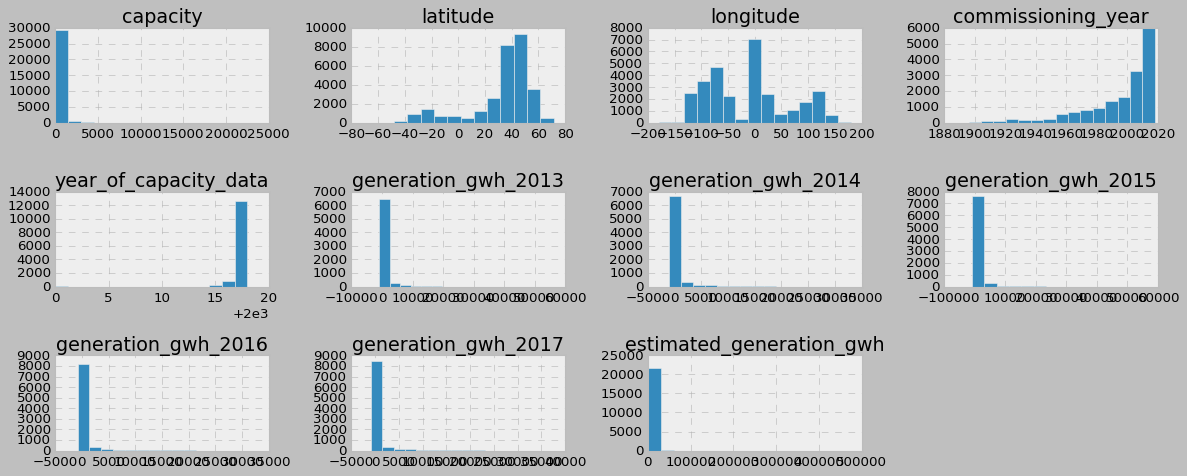

In [110]:
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.style.use('ggplot')
plt.show()

#### From boxplot, we can see that most of the columns are skewed. Almost all the columns have outliers.

### **Scatter plot to identify the relationship between dependent (capacity) and independent features**

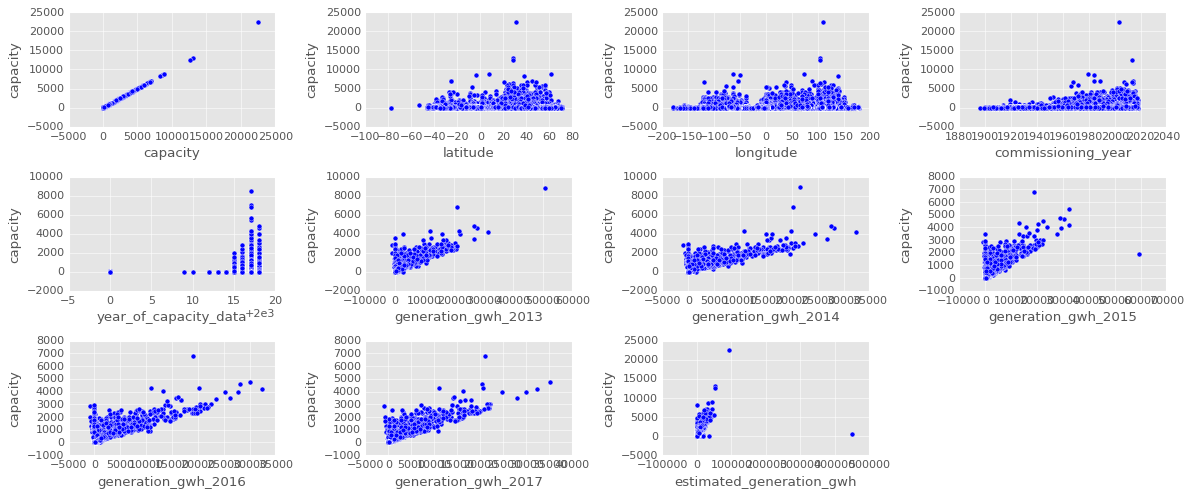

In [111]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    plt.style.use('ggplot')
    sns.scatterplot(data=df,x=col,y='capacity')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

#### **Enumerate()** is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.

## **Count plot to find the mostly used Fuel type**

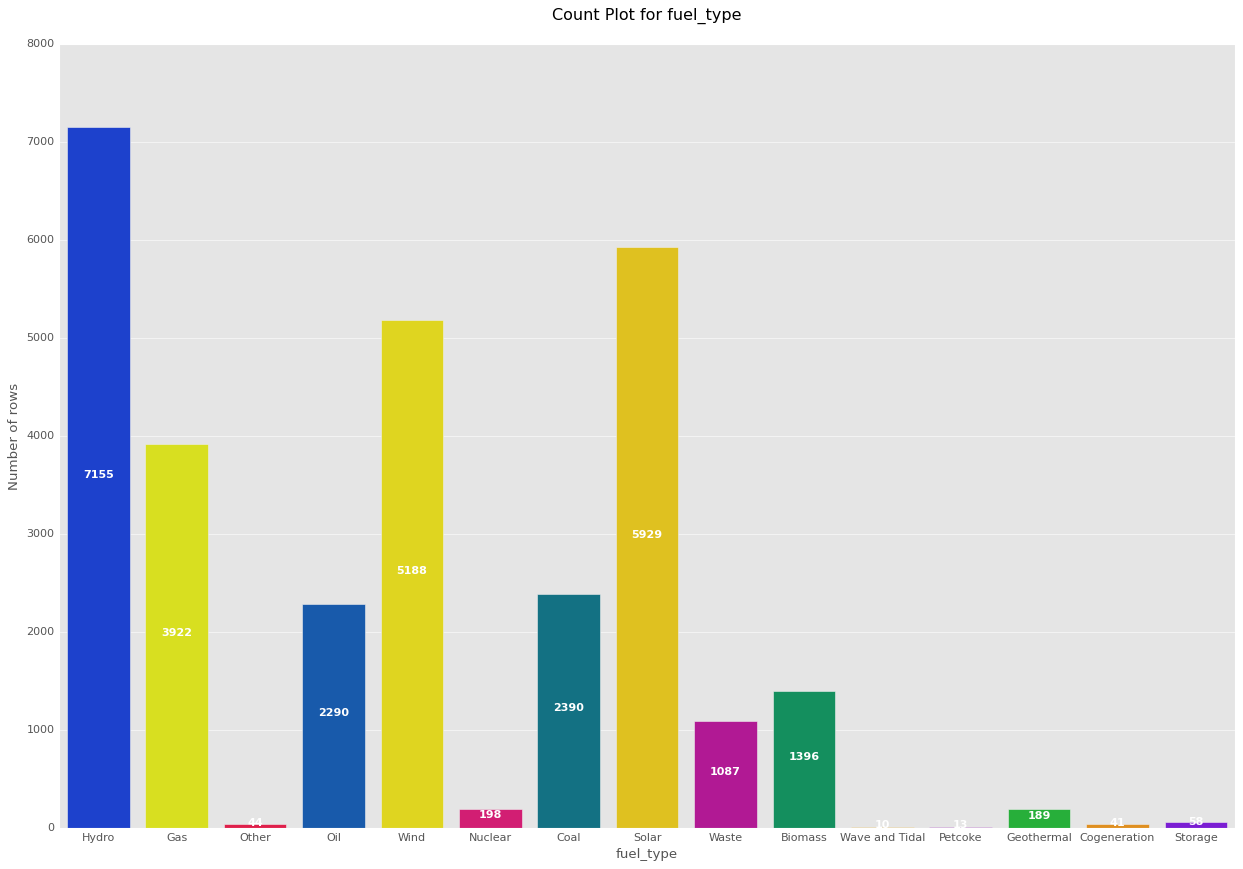

In [112]:
plt.figure(figsize=(15, 10))
col_name = 'fuel_type'

# Create the count plot
ax = sns.countplot(x=col_name, data=df, palette="prism")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height() / 2), 
                ha="center", color='white', fontweight='bold')

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel("Number of rows")
plt.show()

#### Most commonly used fuel type is **Hydro (7155)** followed by **Solar (5929)** and **Wind (5188)** respectively.



## **Count plot to find the mostly used Geolocation source**

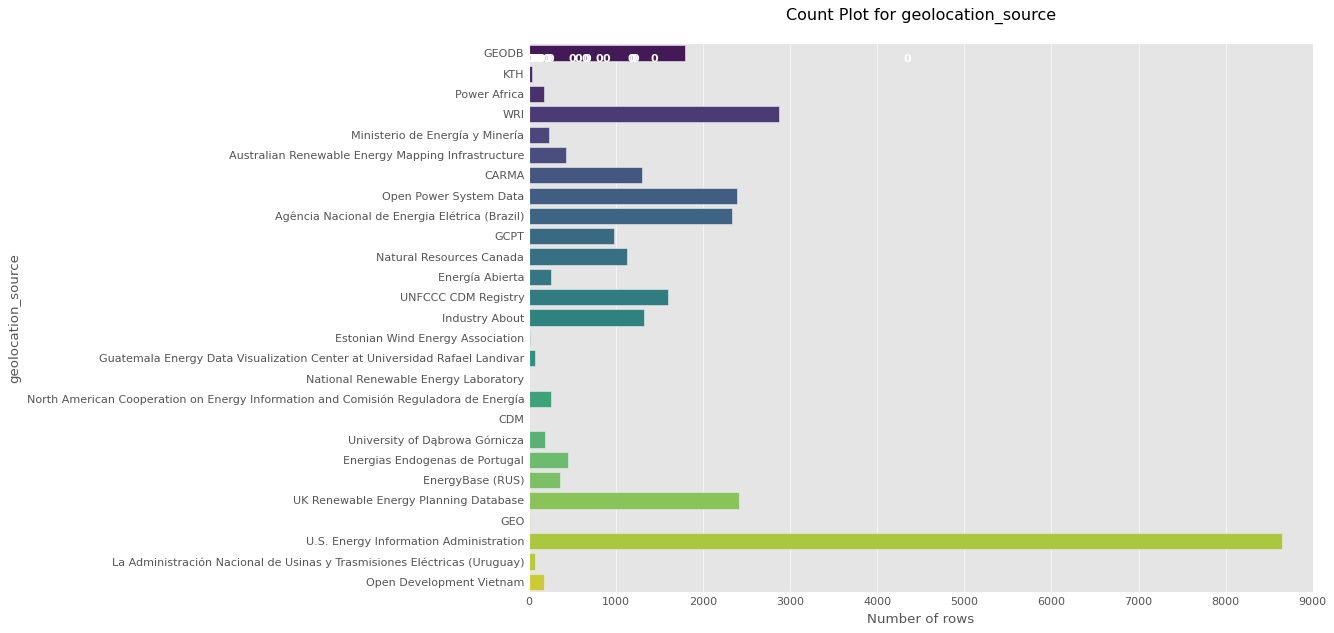

In [113]:
plt.figure(figsize=(10, 7))
col_name = 'geolocation_source'

# Create the count plot
ax = sns.countplot(y=col_name, data=df, palette="viridis")

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_y() + p.get_width() / 2, p.get_height() / 2), 
                ha="center", color='white', fontweight='bold')

plt.title(f"Count Plot for {col_name}\n")
plt.xlabel("Number of rows")
plt.show()

#### Most data are collected from **U.S Energy Information Administration** followed by **WRI** and **UK Renewable Energy Planning Database** respectively.

## **Scatter plot to estimate capacity of powerplants commissioned in various years**

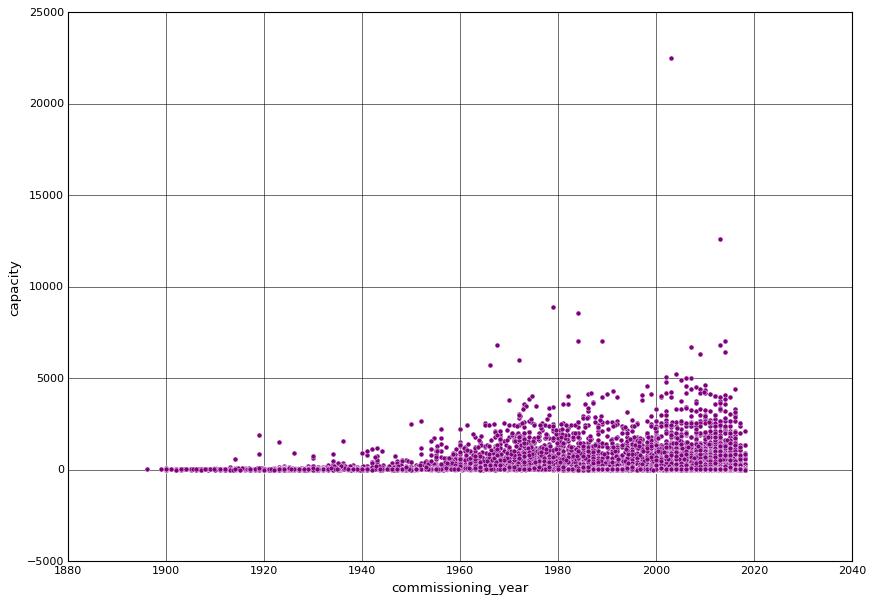

In [114]:
plt.figure(figsize=(10, 7))
plt.style.use('grayscale')
sns.scatterplot(x = "commissioning_year", y = "capacity", data = df, color='purple')
plt.show()

#### Energy generating capacity measured in mega watts was **pretty low in the 90s** times compared to recent years due to the invention of efficient fuel types used for power generation mostly in 2000-2020.

## **Pie-plot to estimate Powerplant Capacity by Hemispheres**

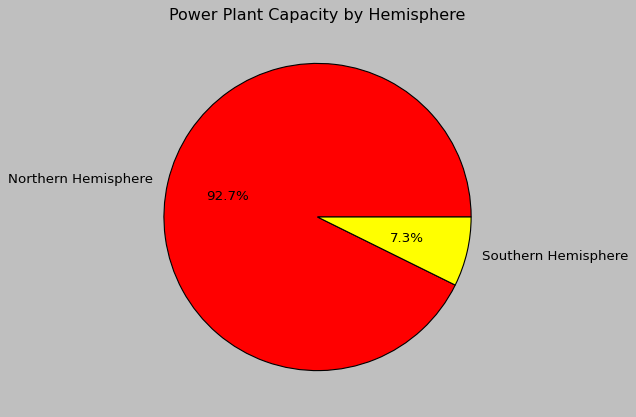

In [115]:
df['latitude_category'] = df['latitude'].apply(lambda x: 'Northern Hemisphere' if x >= 0 else 'Southern Hemisphere')

# Sum capacities for each latitude category
capacity_by_latitude = df.groupby('latitude_category')['capacity'].sum()

plt.style.use('classic')
plt.pie(capacity_by_latitude, labels=capacity_by_latitude.index, autopct='%1.1f%%', colors=['red', 'yellow'])
plt.title("Power Plant Capacity by Hemisphere")
plt.show()

## **Scatter plot to determine powerplant capacity in different latitudes**

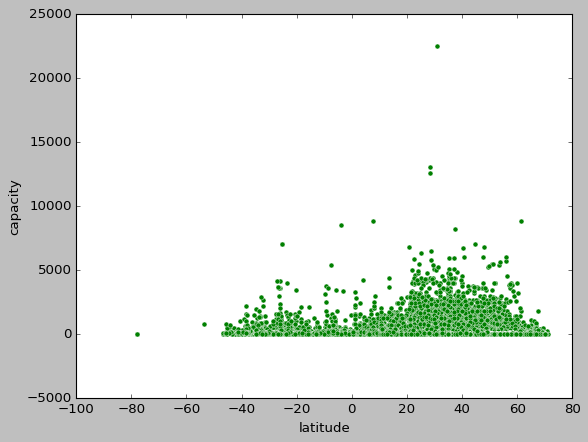

In [116]:
plt.style.use('classic')
sns.scatterplot(x = "latitude", y = "capacity", data = df, color='green')
plt.show()

#### Capacity of powerplants measured in mega watts is highest between **20 to 40** decimal degrees.

## **Bar plot to estimate capacity of powerplants by various fuels**

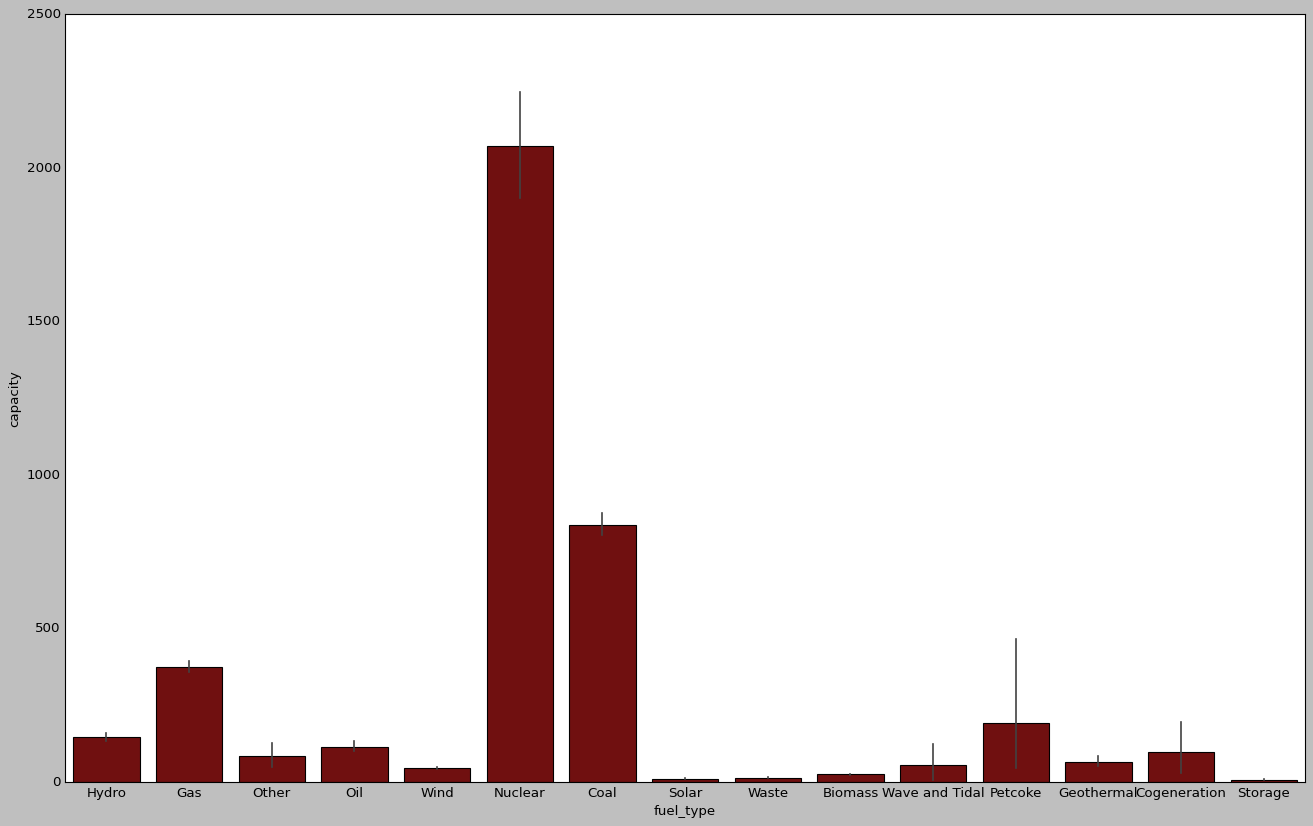

In [117]:
plt.figure(figsize=(20, 12))
plt.style.use('_mpl-gallery-nogrid')
sns.barplot(x = "fuel_type", y = "capacity", data = df, color='maroon')
plt.show()

#### Powerplants having most capacity uses **Nuclear** followed by **Coal** and **Gas** respectively. Least capacity is for **Storage**.

## **Cat Plot to determine the consumption of fuel types in various latitudes**

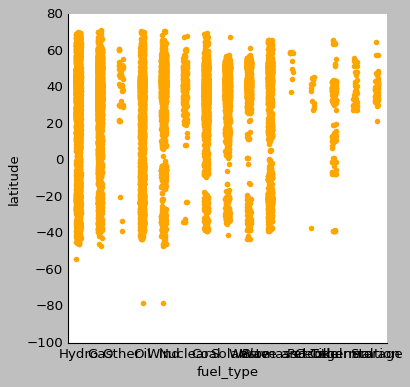

In [118]:
sns.catplot(x = "fuel_type", y = "latitude", data = df, color='orange')
plt.show()

#### **Hydro fuel type** is used almost in all latitudes due to availability of water. **Wave and tidal fuel type** is least used.

## **Hist plot to find the distribution of values in each numerical columns**

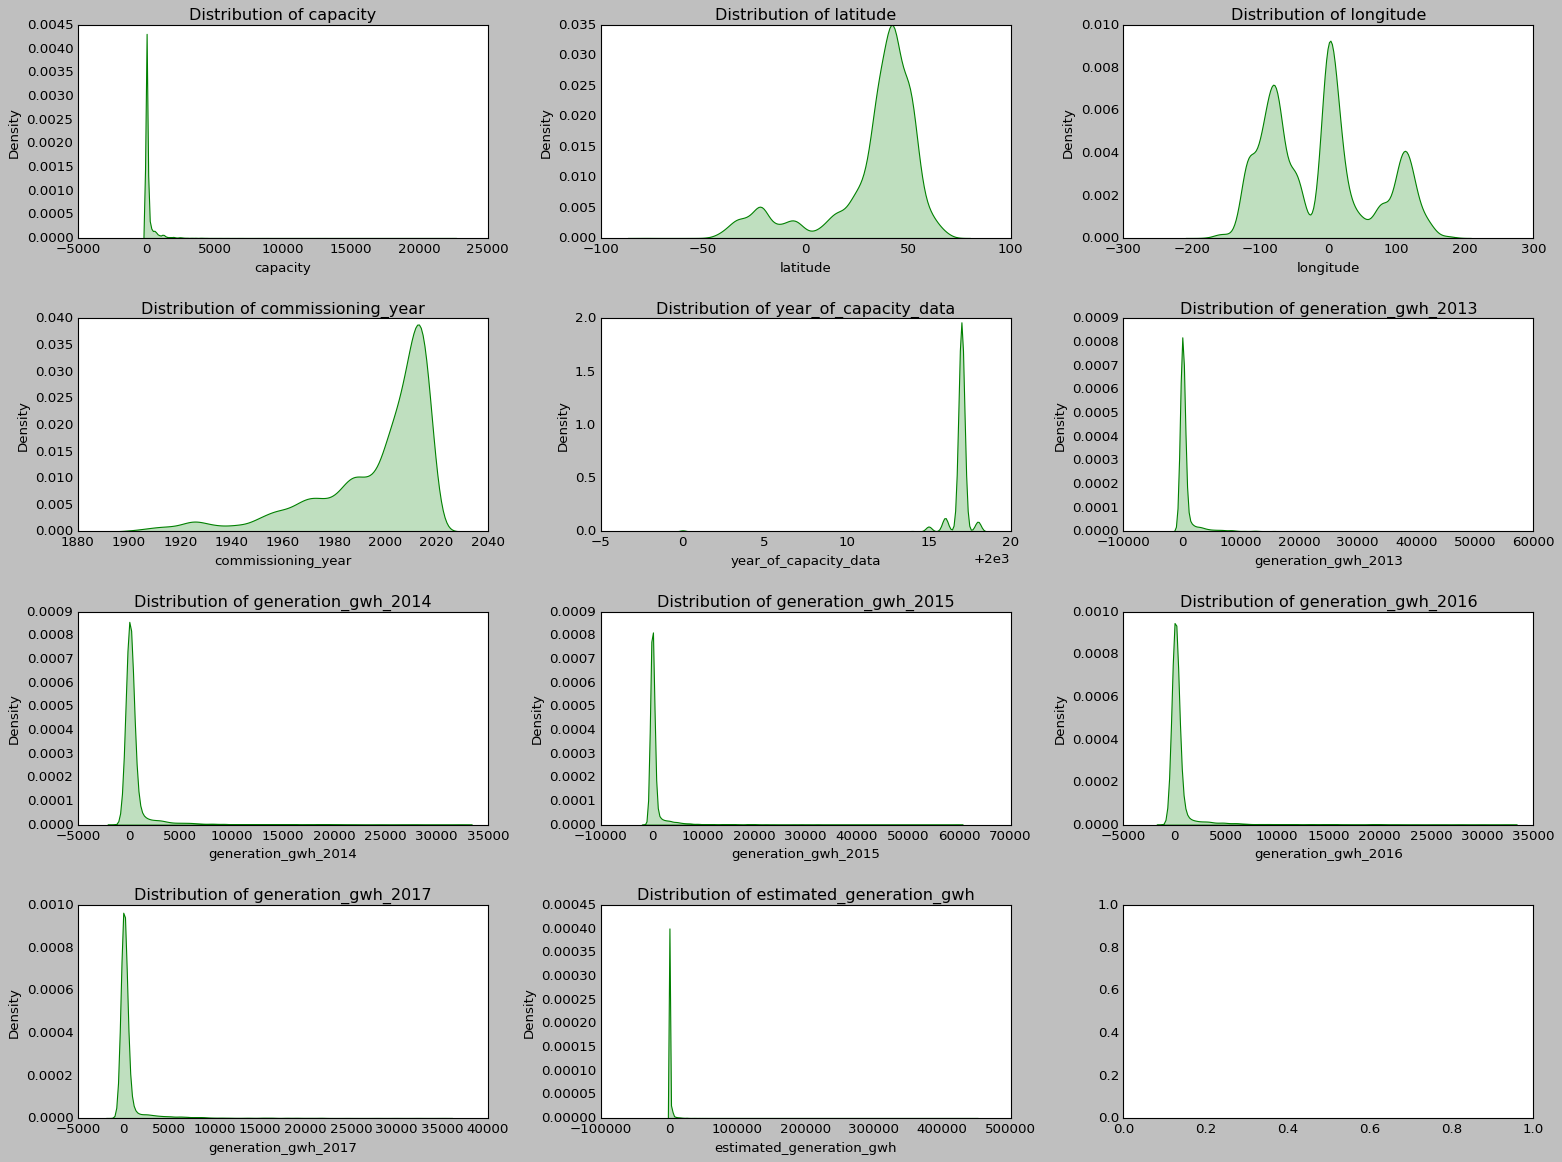

In [119]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(20, 15))  
index = 0
ax = ax.flatten()

for col, value in df.select_dtypes(include='number').items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    ax[index].set_title(f'Distribution of {col}') 
    ax[index].set_ylabel('Density')
    index += 1

plt.tight_layout(pad=2.0, w_pad=1.0, h_pad=2.0)
plt.show()

#### There is skewness in almost all the numerical columns. This need to be rectified before building the model.

## **Pairplot**

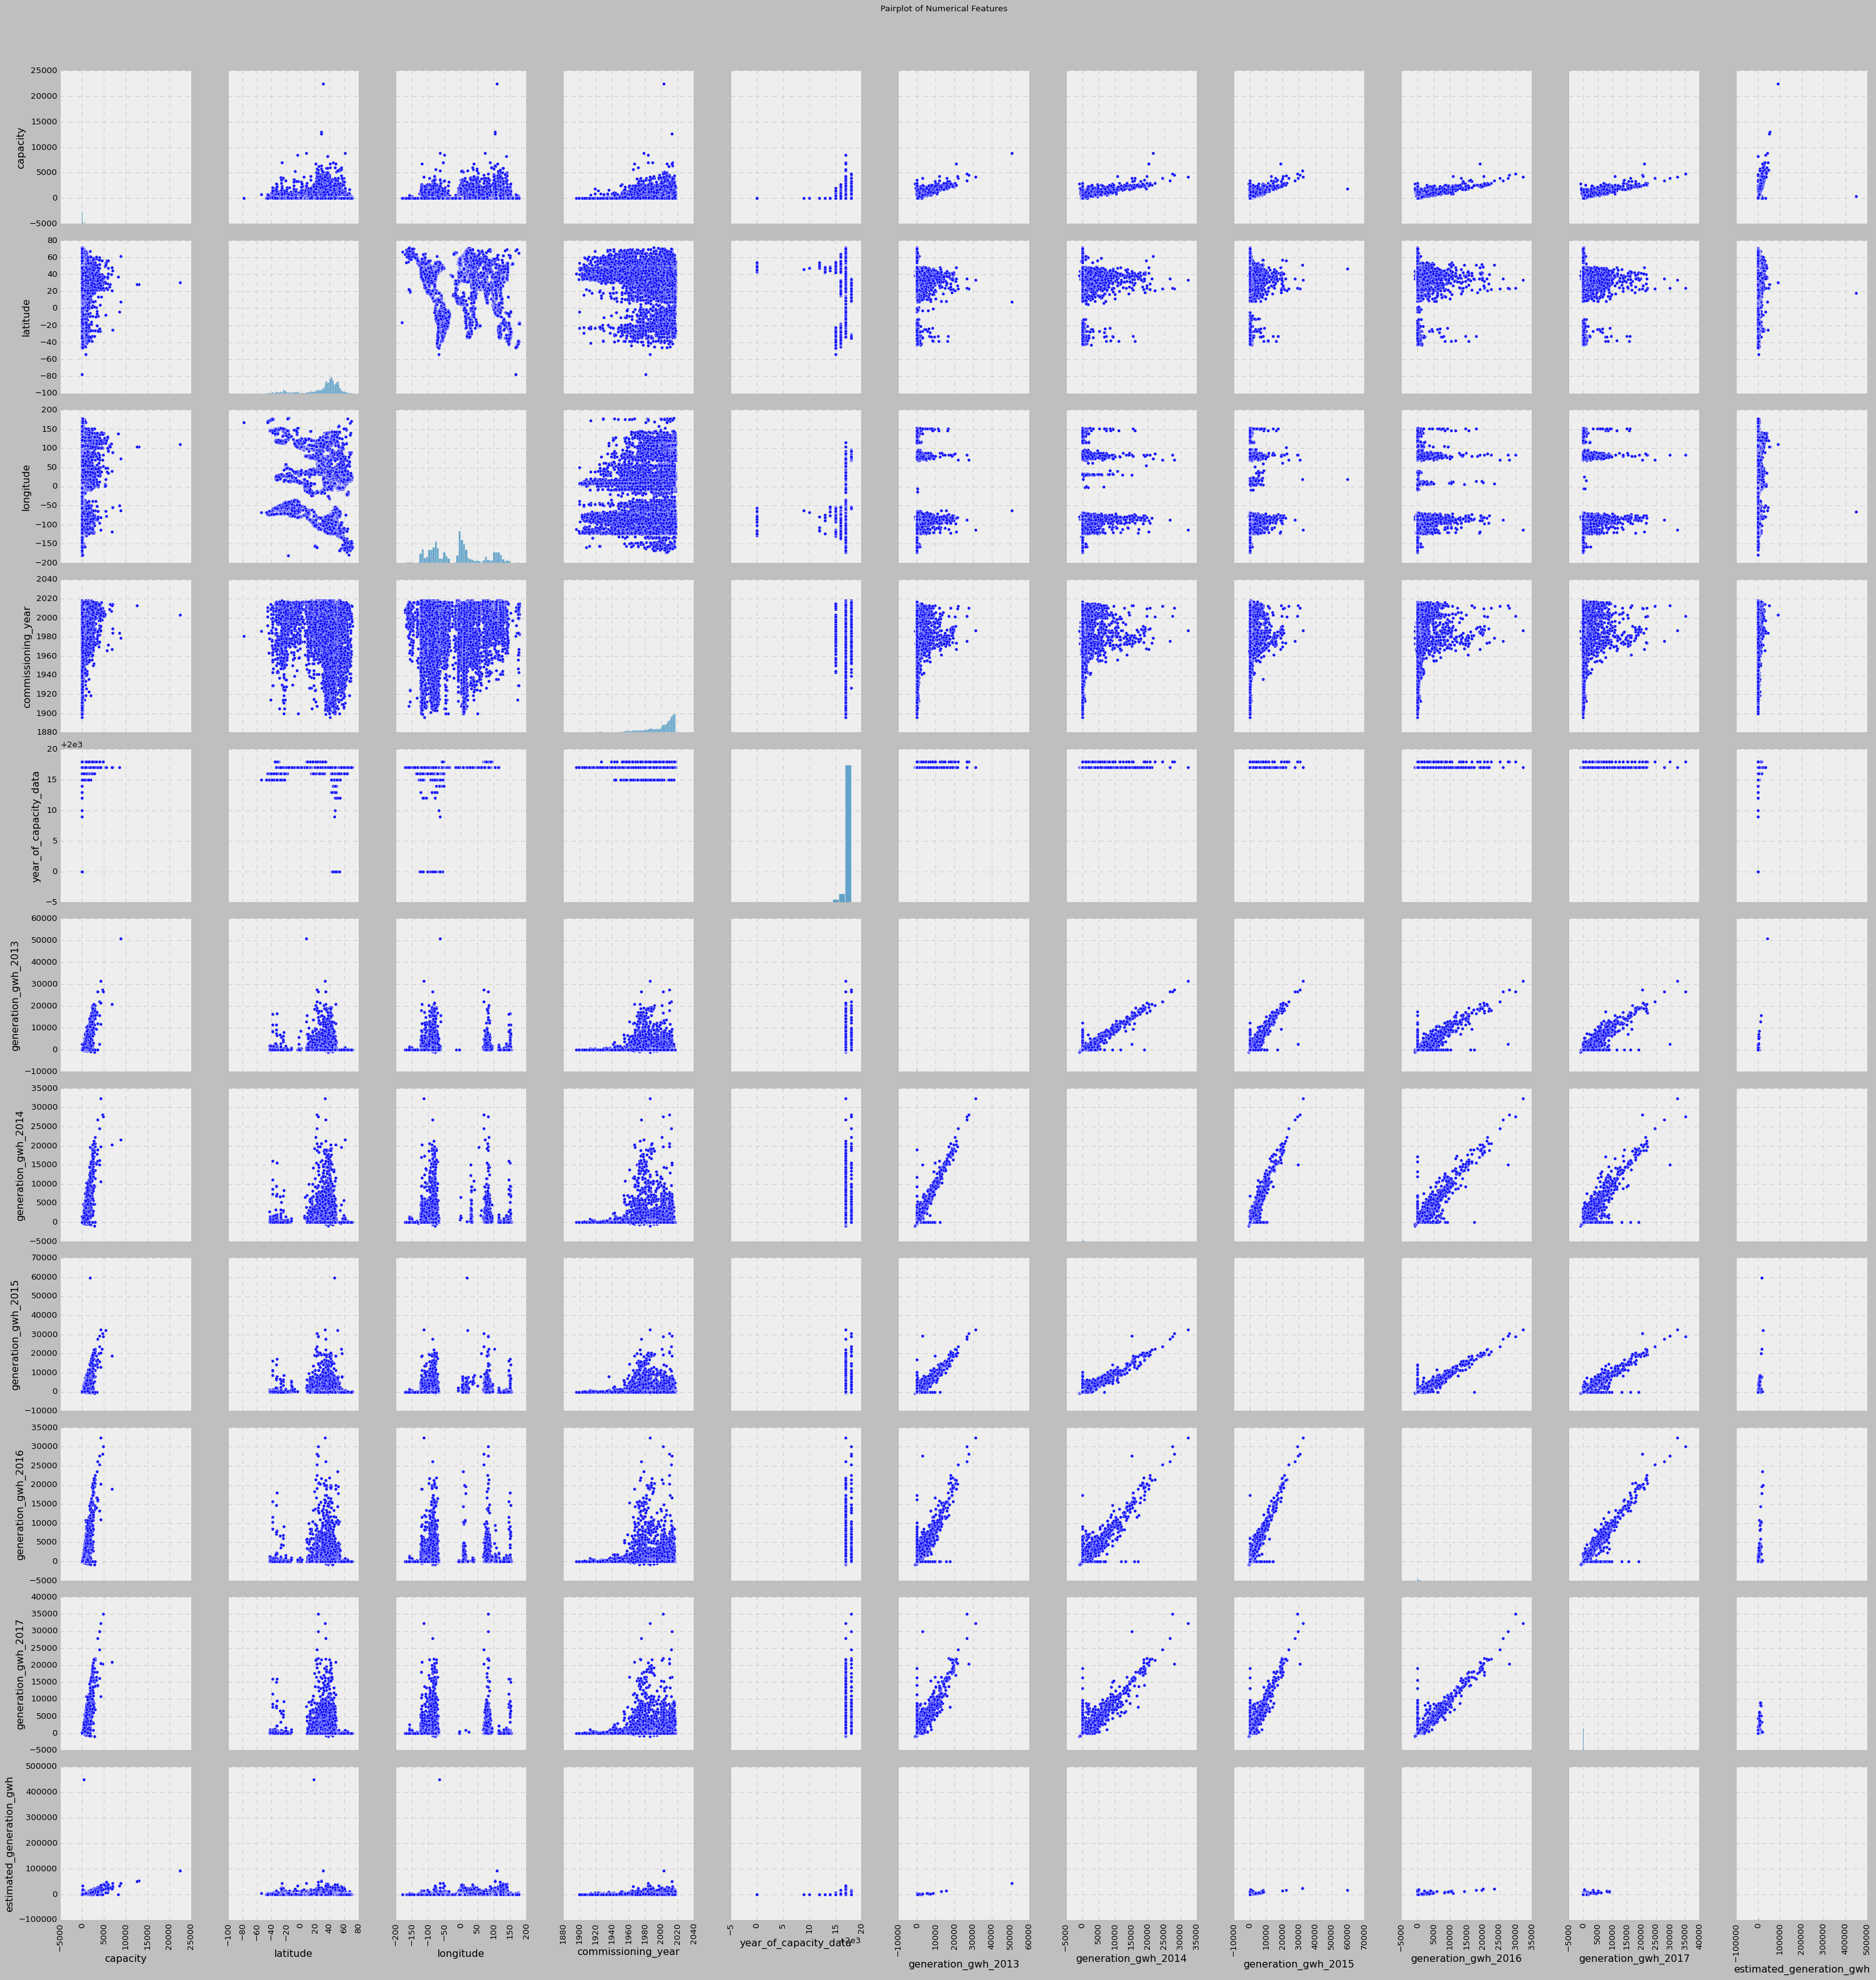

In [120]:
plt.style.use('bmh') 

g = sns.pairplot(df, height=3.5)

for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)

plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

## **Box plot to identify outliers**

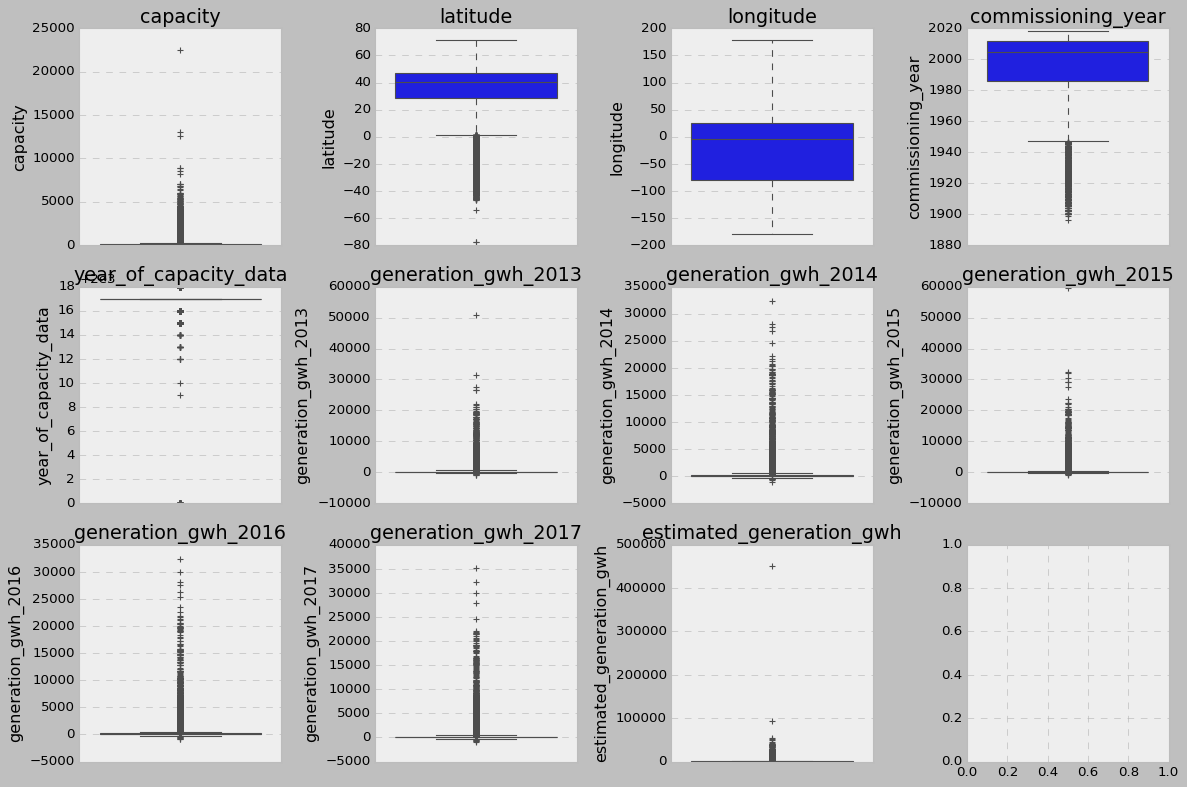

In [121]:
# Create subplots
fig, axes = plt.subplots(nrows =3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(num_cols):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

#### There are outliers in almost all the columns. Only the **longitude** column has no outliers.

## **Skewness and Kurtosis**

In [122]:
# Define numerical columns
num_cols = df.select_dtypes(include='number').columns

# Calculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurtosis_values = df[num_cols].apply(lambda x: kurtosis(x, fisher=False))

print("Skewness of numerical columns:\n", skewness)
print("\nKurtosis of numerical columns:\n", kurtosis_values)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print("\nVariables with positive skewness (skew > 1):\n", positive_skewness)
print("\nVariables with negative skewness (skew < -1):\n", negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurtosis_values[kurtosis_values < 3]
leptokurtic = kurtosis_values[kurtosis_values > 3]

print("\nVariables with platykurtic distribution (kurtosis < 3):\n", platykurtic)
print("\nVariables with leptokurtic distribution (kurtosis > 3):\n", leptokurtic)

Skewness of numerical columns:
 capacity                    8.284579
latitude                   -1.534160
longitude                   0.401595
commissioning_year               NaN
year_of_capacity_data            NaN
generation_gwh_2013              NaN
generation_gwh_2014              NaN
generation_gwh_2015              NaN
generation_gwh_2016              NaN
generation_gwh_2017              NaN
estimated_generation_gwh         NaN
dtype: float64

Kurtosis of numerical columns:
 capacity                    170.859192
latitude                      4.553364
longitude                     2.118484
commissioning_year                 NaN
year_of_capacity_data              NaN
generation_gwh_2013                NaN
generation_gwh_2014                NaN
generation_gwh_2015                NaN
generation_gwh_2016                NaN
generation_gwh_2017                NaN
estimated_generation_gwh           NaN
dtype: float64

Variables with positive skewness (skew > 1):
 capacity    8.284579
d

#### 
**Skewness Analysis :**

* Positive Skewness : Variables with skewness greater than 1 have a right-skewed distribution, indicating a longer tail on the right side. 
* Negative Skewness : Variables with skewness less than -1 have a left-skewed distribution, meaning they have a longer tail on the left side. 
* Moderate Skewness (between -1 and 1): If skewness is between -1 and 1, the distribution is relatively symmetric.

**Kurtosis Analysis :**

* Platykurtic : Platykurtic distributions have a kurtosis value less than 3, indicating a "flatter" shape with fewer outliers. Such distributions have lighter tails, suggesting that extreme values are less likely to occur.
* Leptokurtic : Leptokurtic distributions have a kurtosis value greater than 3, which means they have heavier tails and a sharper peak. This suggests a higher likelihood of extreme values or outliers.
* Mesokurtic : A kurtosis close to 3 resembles a normal distribution, neither too flat nor too peaked.

**Normal-Like Distributions : Variables with skewness close to 0 and kurtosis around 3 tend to be normally distributed.**

### **Correlation with heatmap to interpret the relation and multicollinearity**

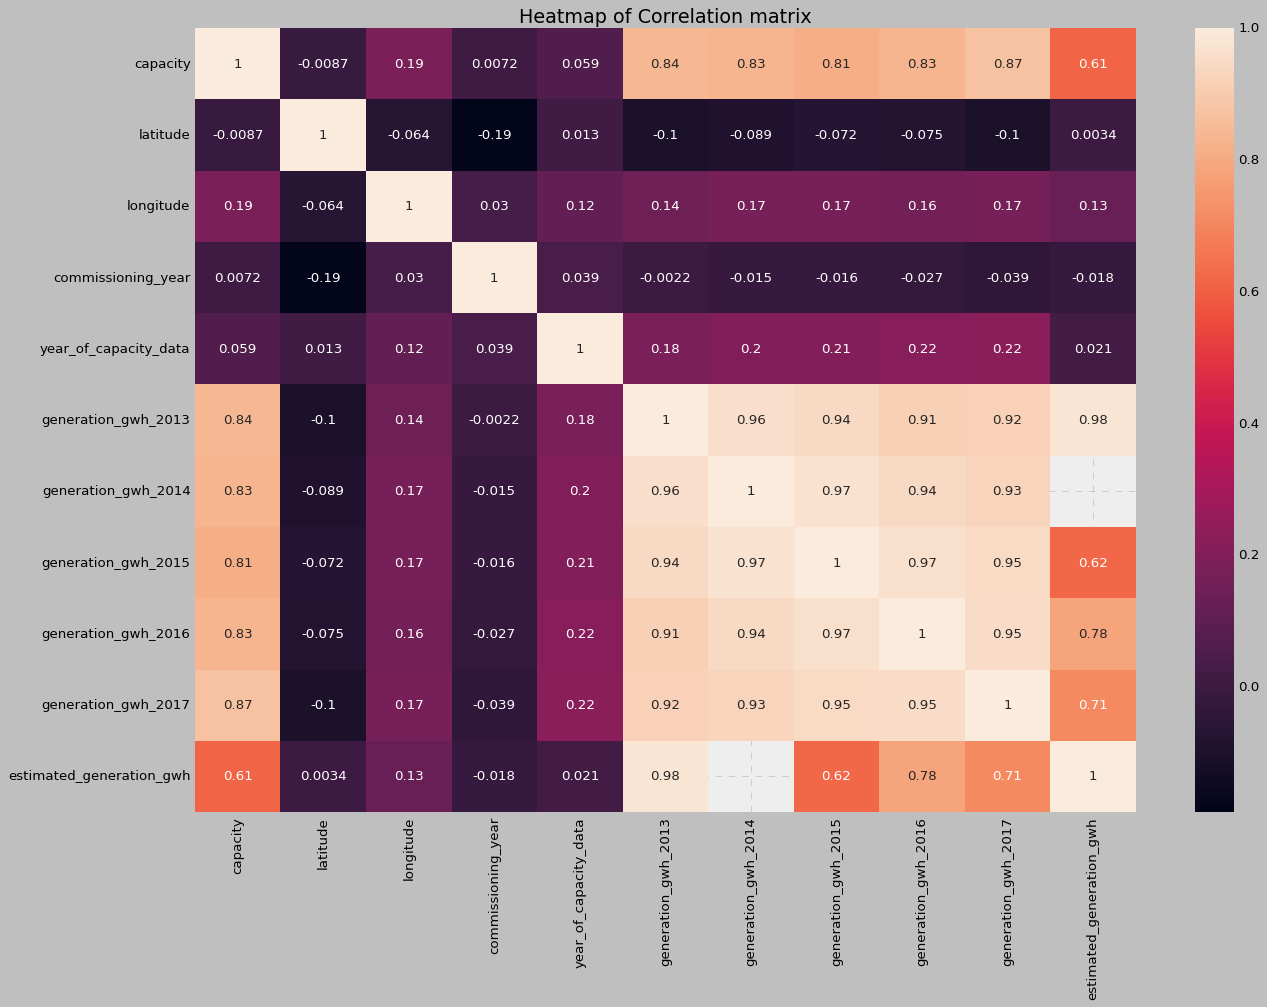

In [123]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_cols].corr(),annot=True, linecolor= 'black')
plt.title("Heatmap of Correlation matrix")
plt.show()

### **Columns with multicollinearity**

1. generation_gwh_2013 and estimated_generation_gwh
2. generation_gwh_2013 and generation_gwh_2017
3. generation_gwh_2013 and generation_gwh_2016
4. generation_gwh_2013 and generation_gwh_2015
5. generation_gwh_2013 and generation_gwh_2014
6. generation_gwh_2014 and generation_gwh_2017
7. generation_gwh_2014 and generation_gwh_2016
8. generation_gwh_2014 and generation_gwh_2015
9. generation_gwh_2015 and generation_gwh_2017
10. generation_gwh_2015 and generation_gwh_2016
11. generation_gwh_2016 and estimated_generation_gwh
12. generation_gwh_2016 and generation_gwh_2017
13. generation_gwh_2017 and estimated_generation_gwh

<Axes: xlabel='generation_gwh_2017', ylabel='estimated_generation_gwh'>

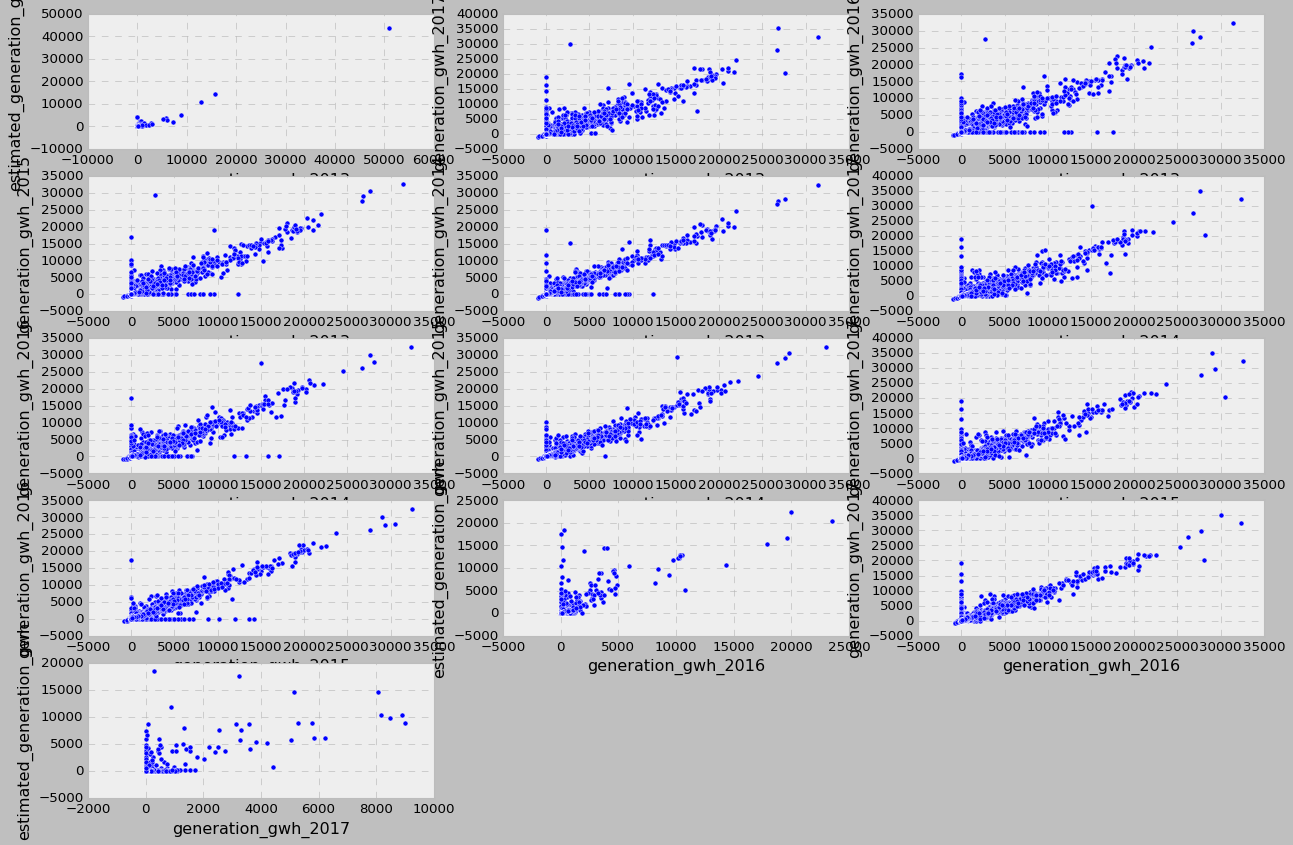

In [124]:
plt.figure(figsize=(15, 10))
plt.subplot(5,3,1)
sns.scatterplot(data=df,x='generation_gwh_2013',y='estimated_generation_gwh')
plt.subplot(5,3,2)
sns.scatterplot(data=df,x='generation_gwh_2013',y='generation_gwh_2017')
plt.subplot(5,3,3)
sns.scatterplot(data=df,x='generation_gwh_2013',y='generation_gwh_2016')
plt.subplot(5,3,4)
sns.scatterplot(data=df,x='generation_gwh_2013',y='generation_gwh_2015')
plt.subplot(5,3,5)
sns.scatterplot(data=df,x='generation_gwh_2013',y='generation_gwh_2014')
plt.subplot(5,3,6)
sns.scatterplot(data=df,x='generation_gwh_2014',y='generation_gwh_2017')
plt.subplot(5,3,7)
sns.scatterplot(data=df,x='generation_gwh_2014',y='generation_gwh_2016')
plt.subplot(5,3,8)
sns.scatterplot(data=df,x='generation_gwh_2014',y='generation_gwh_2015')
plt.subplot(5,3,9)
sns.scatterplot(data=df,x='generation_gwh_2015',y='generation_gwh_2017')
plt.subplot(5,3,10)
sns.scatterplot(data=df,x='generation_gwh_2015',y='generation_gwh_2016')
plt.subplot(5,3,11)
sns.scatterplot(data=df,x='generation_gwh_2016',y='estimated_generation_gwh')
plt.subplot(5,3,12)
sns.scatterplot(data=df,x='generation_gwh_2016',y='generation_gwh_2017')
plt.subplot(5,3,13)
sns.scatterplot(data=df,x='generation_gwh_2017',y='estimated_generation_gwh')

#### Columns with multicollinearity are :
* generation_gwh_2013
* generation_gwh_2014
* generation_gwh_2015
* generation_gwh_2016
* generation_gwh_2017

**These columns need to be dropped.**

## **Columns which are highly correlated with the target variable - capacity**

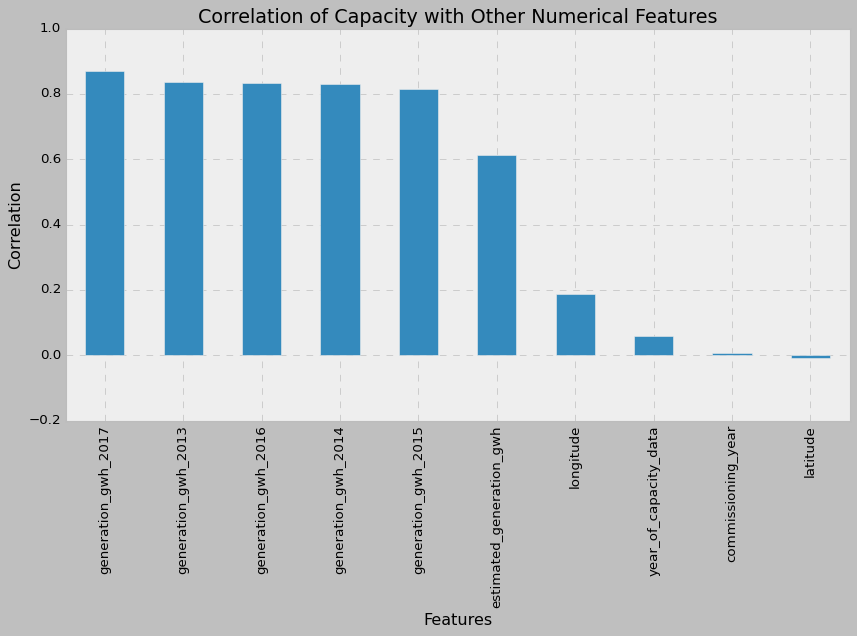

In [125]:
df_corr = df.select_dtypes(include='number').corr()

# Plot the correlation of 'capacity' with other numerical columns
plt.figure(figsize=(10, 5))
df_corr['capacity'].sort_values(ascending=False).drop('capacity').plot.bar()
plt.title('Correlation of Capacity with Other Numerical Features')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

#### Columns which are highly correlated with the target variable - **capacity** are :
* generation_gwh_2013
* generation_gwh_2014
* generation_gwh_2015
* generation_gwh_2016
* generation_gwh_2017
* estimated_generation_gwh

### **Analysing categorical columns**

In [126]:
for col in cat_cols:
    print(f"Values in {col}:\n{df[col].unique()}")
    print(f"Number of unique values in {col}: {df[col].nunique()}\n")

Values in country:
['AFG' 'ALB' 'DZA' 'AGO' 'ATA' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BHR' 'BGD'
 'BLR' 'BEL' 'BEN' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'BRN' 'BGR' 'BFA' 'BDI'
 'KHM' 'CMR' 'CAN' 'CPV' 'CAF' 'CHL' 'CHN' 'COL' 'COG' 'CRI' 'CIV' 'HRV'
 'CUB' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI'
 'EST' 'ETH' 'FJI' 'FIN' 'FRA' 'GUF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC'
 'GTM' 'GIN' 'GNB' 'GUY' 'HND' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL'
 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KOS' 'KWT' 'KGZ' 'LAO' 'LVA'
 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LUX' 'MKD' 'MDG' 'MWI' 'MYS' 'MLI' 'MRT'
 'MUS' 'MEX' 'MDA' 'MNG' 'MNE' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NZL'
 'NIC' 'NER' 'NGA' 'PRK' 'NOR' 'OMN' 'PAK' 'PAN' 'PNG' 'PRY' 'PER' 'PHL'
 'POL' 'PRT' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU' 'SEN' 'SRB' 'SLE' 'SGP' 'SVK'
 'SVN' 'ZAF' 'KOR' 'ESP' 'LKA' 'SDN' 'SWZ' 'SWE' 'CHE' 'SYR' 'TWN' 'TJK'
 'TZA' 'THA' 'TGO' 'TTO' 'TUN' 'TUR' 'TKM' 'UGA' 'UKR' 'ARE' 'GBR' 'USA'
 'URY' 'UZB' 'VEN' 'VNM' 'ESH' '

#### 
* Number of unique values in country: 164
* Number of unique values in country_long: 164
* Number of unique values in name: 29538
* Number of unique values in gppd_idnr: 29910
* Number of unique values in fuel_type: 15
* Number of unique values in other_fuel1: 12
* Number of unique values in other_fuel2: 11
* Number of unique values in other_fuel3: 7
* Number of unique values in owner: 9565
* Number of unique values in source: 865
* Number of unique values in url: 4869
* Number of unique values in geolocation_source: 27
* Number of unique values in wepp_id: 15399

### **Cross Tabulation**

#### **Cross Tabulation** (or crosstab) is a statistical tool used to examine the relationship between two or more categorical variables by displaying their frequencies in a matrix format. Each cell in a cross-tabulation table shows the count (or sometimes proportion) of occurrences for combinations of values across the variables. It allows you to understand how two variables are related or how one variable might influence another.

In [127]:
pd.crosstab(df["capacity"], df["fuel_type"], margins=True)

fuel_type,Biomass,Coal,Cogeneration,Gas,Geothermal,Hydro,Nuclear,Oil,Other,Petcoke,Solar,Storage,Waste,Wave and Tidal,Wind,All
capacity,,,,,,,,,,,,,,,,
1.0,35,0,0,22,1,145,0,36,0,0,398,5,43,2,28,715
1.00009,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1.0008,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1.0015,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1.00209,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8865.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
12600.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
13050.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


#### Insights :
* This table helps you understand the distribution of energy capacity values across different types of fuels.
* The rows represent different capacity values.
* The columns represent the different fuel types.
* There are a total of 29910 instances.

<a id='6'></a>
## <span style="color:#008080">6. <strong>Data Preprocessing</strong></span>

In [128]:
df1=df.copy()

In [129]:
df1.shape

(29910, 25)

### **Remove columns having more than 80% null values**

In [130]:
round(df1.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

other_fuel3                 99.65
other_fuel2                 98.99
other_fuel1                 93.44
generation_gwh_2013         76.61
generation_gwh_2014         75.13
generation_gwh_2015         72.77
generation_gwh_2016         70.01
generation_gwh_2017         69.20
year_of_capacity_data       54.05
commissioning_year          45.49
wepp_id                     45.23
owner                       34.70
estimated_generation_gwh    27.14
geolocation_source           1.40
url                          0.06
source                       0.05
country                      0.00
country_long                 0.00
fuel_type                    0.00
longitude                    0.00
latitude                     0.00
capacity                     0.00
gppd_idnr                    0.00
name                         0.00
latitude_category            0.00
dtype: float64

#### 
Features having more than 80% null values are considered irrelevant.

From above result, missing value percentage of **other_fuel3** is **99.65%**, **other_fuel2** is **98.99%** and **other_fuel1** is **93.44%**. 
These columns can be dropped.

In [131]:
df1.drop(['other_fuel1', 'other_fuel2', 'other_fuel3'], axis=1, inplace=True)

In [132]:
df1.shape

(29910, 22)

In [133]:
df1.head()

,country,country_long,name,gppd_idnr,capacity,latitude,longitude,fuel_type,commissioning_year,owner,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,latitude_category
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Hemisphere
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Hemisphere
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Hemisphere
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Hemisphere
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Hemisphere


### **Remove columns having multi-collinearity**

#### Columns with multicollinearity are :
* generation_gwh_2013
* generation_gwh_2014
* generation_gwh_2015
* generation_gwh_2016
* generation_gwh_2017

**These columns can to be dropped.**

In [134]:
df1.drop(['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'], axis=1, inplace=True)

In [135]:
df1.shape

(29910, 17)

### commissioning_year

In [136]:
values_in_commissioning_year = df1['commissioning_year'].value_counts()

print(values_in_commissioning_year)

commissioning_year
2016.000000    851
2014.000000    800
2015.000000    788
2012.000000    739
2017.000000    712
              ... 
2009.200000      1
1975.857143      1
2002.325581      1
1959.147335      1
2013.775510      1
Name: count, Length: 2035, dtype: int64


#### Years must always be whole numbers. So, we can round these values to nearest integers.

In [137]:
df1['commissioning_year'] = df1['commissioning_year'].round()

In [138]:
df1['commissioning_year'].value_counts()

commissioning_year
2016.0    868
2014.0    823
2015.0    802
2012.0    768
2017.0    717
         ... 
1902.0      4
1903.0      4
1901.0      2
1896.0      1
1899.0      1
Name: count, Length: 121, dtype: int64

#### Now, all values are rounded to nearest integer years.

## To find number of NaN values in each column

In [139]:
df1.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity                    float64
latitude                    float64
longitude                   float64
fuel_type                    object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                      object
year_of_capacity_data       float64
estimated_generation_gwh    float64
latitude_category            object
dtype: object

In [140]:
df1.isna().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity                        0
latitude                        0
longitude                       0
fuel_type                       0
commissioning_year          13607
owner                       10379
source                         15
url                            18
geolocation_source            419
wepp_id                     13529
year_of_capacity_data       16167
estimated_generation_gwh     8119
latitude_category               0
dtype: int64

#### 
There are **13607** NaN values in **commissioning year**, **10379** NaN values in **owner**, **13529** NaN values in **wepp_id**, **16167** NaN values in **year_of_capacity_data** and **8119** NaN values in **estimated_generation_gwh**.

NaN values in numerical columns can be removed by either dropping rows or filling it with **Mean, Median or Mode or any other appropriate value.**

NaN values in **year_of_capacity_data** can be replaced with **Zero**.
NaN values in **commissioning_year**  can be **dropped** and NaN values in **estimated_generation_gwh** can be replaced with **Median**.

In [141]:
df1 = df1.dropna(subset=['commissioning_year'])
df1['estimated_generation_gwh'] = df1['estimated_generation_gwh'].fillna(df1['estimated_generation_gwh'].median())
df1['year_of_capacity_data'] = df1['year_of_capacity_data'].fillna(0)

In [142]:
df1[['commissioning_year', 'year_of_capacity_data', 'estimated_generation_gwh']].isna().sum()

commissioning_year          0
year_of_capacity_data       0
estimated_generation_gwh    0
dtype: int64

#### All NaN values in numerical columns are removed.

In [143]:
df1.shape

(16303, 17)

<a id='07'></a>
## **Handling Outliers**

In [144]:
num_cols1 = df1.select_dtypes(include='number').columns
print(num_cols1)

Index(['capacity', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'estimated_generation_gwh'],
      dtype='object')


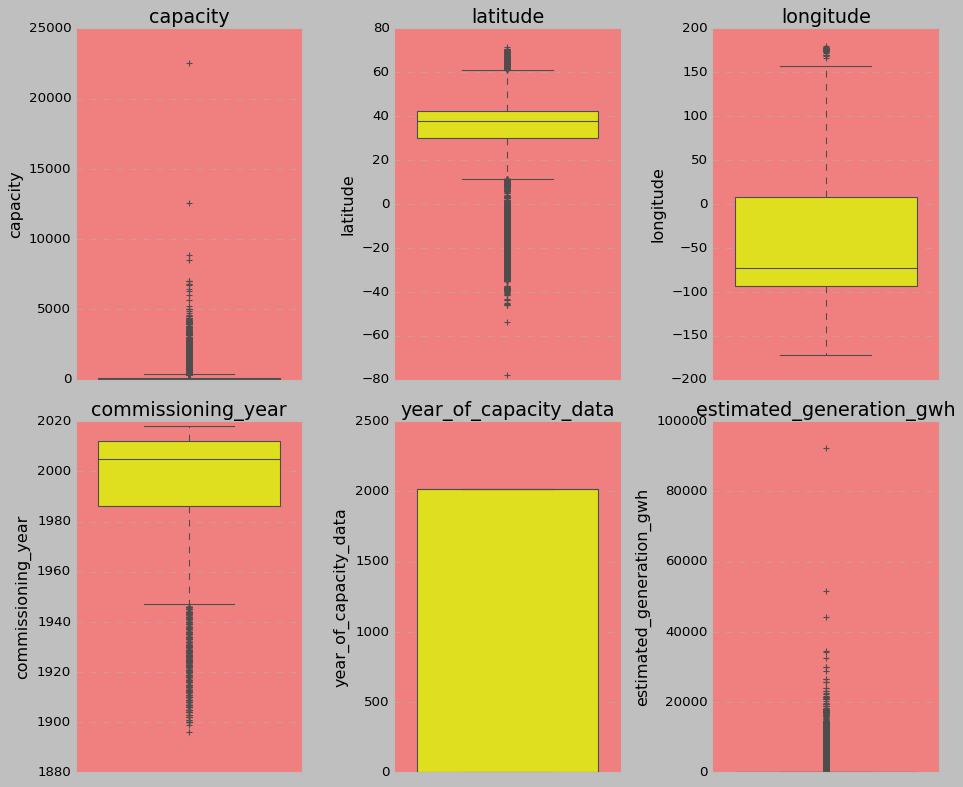

In [145]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()

# Loop through columns in num_cols and plot boxplot for each
for i, column in enumerate(num_cols1):
    if i < len(axes): 
        sns.boxplot(y=df1[column], ax=axes[i], color = 'yellow')
        axes[i].set_title(column)
        axes[i].set_facecolor('lightcoral')

plt.tight_layout()
plt.show()

## **Removing Outliers using IQR method**

In [146]:
def whisker(col):
 q1,q3=np.percentile(col,[25,75])
 iqr=q3-q1
 lw=q1-1.5*iqr
 uw=q3+1.5*iqr
 return lw,uw

In [147]:
for i in df1.select_dtypes(include="number").columns:
 lw,uw=whisker(df1[i])
 df1[i]=np.where(df1[i]<lw,lw,df1[i])
 df1[i]=np.where(df1[i]>uw,uw,df1[i])

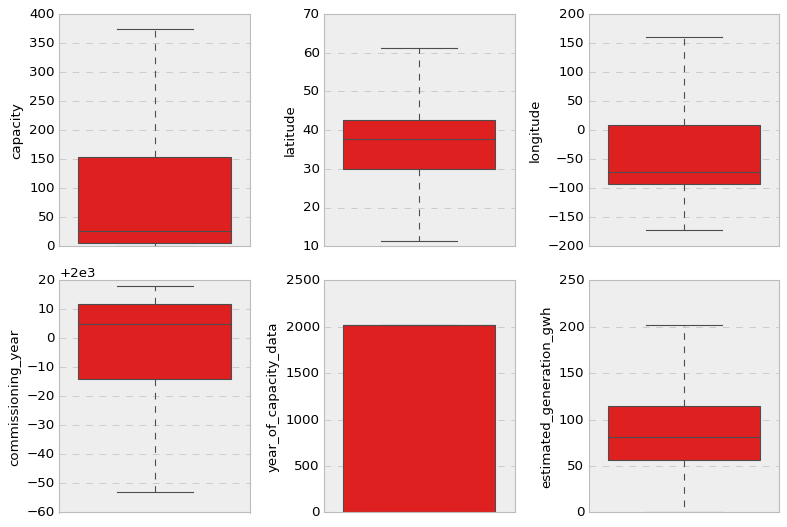

In [148]:
# Visualizing the distributions with box plots

plt.figure(figsize=(10,10), facecolor='white')
plotnumber=1
for column in num_cols1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(y=df1[column],color='red', ax=ax)
        plt.ylabel(column, fontsize=12)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Almost all outliers are removed.

<a id='7'></a>
## <span style="color:#008080">7.<strong><em></em>Feature Engineering</strong></span>

## Encoding all the categorical columns

In [149]:
# Label encoding
label_encoder = LabelEncoder()
cat_cols1 = df1.select_dtypes(include=['object']).columns

for col in cat_cols1:
    df1[col] = label_encoder.fit_transform(df1[col])

df1.head(10)

,country,country_long,name,gppd_idnr,capacity,latitude,longitude,fuel_type,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,estimated_generation_gwh,latitude_category
7,0,0,1465,11677,27.0,39.9116,20.1047,5,1965.0,6063,116,339,7,1044,0.0,89.132075,0
8,0,0,4697,11678,375.0,42.2514,20.0431,5,1978.0,6063,116,339,7,1045,0.0,201.713852,0
9,0,0,7612,11679,375.0,42.1033,19.8224,5,1985.0,6063,116,339,7,1046,0.0,201.713852,0
10,0,0,7917,11680,5.0,41.3428,19.8964,5,1951.0,6063,116,339,7,1047,0.0,16.505940,0
11,0,0,13002,11681,24.0,41.6796,19.8305,5,1963.0,6063,116,339,7,1048,0.0,79.228512,0
12,0,0,14679,11682,25.0,41.6796,19.8936,5,1958.0,6063,116,339,7,1049,0.0,82.529700,0
13,0,0,14939,11683,250.0,42.0137,19.6359,5,1971.0,6063,116,339,7,1050,0.0,201.713852,0
16,21,1,566,14206,71.0,36.8924,7.7634,3,2010.0,4956,18,178,7,1632,0.0,201.713852,0
17,21,1,633,14194,375.0,36.5988,3.1375,3,2010.0,5019,18,178,7,3189,0.0,201.713852,0
18,21,1,1630,14204,100.0,36.5914,2.9223,3,1980.0,6063,18,178,7,1633,0.0,201.713852,0


<a id='8'></a>
## <span style="color:#008080">8. <strong>Data Splitting</strong></span> 

#### Split data into features (x) and target (y)

In [150]:
x = df1.drop('capacity', axis=1)
y = df1['capacity']

#### Train-Test Split

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<a id='9'></a>
## <span style="color:#008080">9. <strong>Feature Selection</strong></span>

In [151]:
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=5)
x_rfe = rfe.fit_transform(x, y)

# Get the selected features
selected_features = x.columns[rfe.support_]
print("Selected Features:", selected_features)

# Get the ranking of features
feature_ranking = rfe.ranking_


print("Feature Ranking:", feature_ranking)

# Get the importance of features
model.fit(x, y)
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importance_df)

Selected Features: Index(['gppd_idnr', 'longitude', 'fuel_type', 'wepp_id',
       'estimated_generation_gwh'],
      dtype='object')
Feature Ranking: [ 9 11  5  1  3  1  1  2  4  7 10  6  1  8  1 12]
Feature Importances:
                      Feature  Importance
14  estimated_generation_gwh    0.335909
6                  fuel_type    0.172059
12                   wepp_id    0.090640
3                  gppd_idnr    0.087551
5                  longitude    0.085434
7         commissioning_year    0.061888
4                   latitude    0.050492
8                      owner    0.034848
2                       name    0.031236
13     year_of_capacity_data    0.011028
11        geolocation_source    0.010768
9                     source    0.009709
0                    country    0.007231
10                       url    0.006878
1               country_long    0.003545
15         latitude_category    0.000784


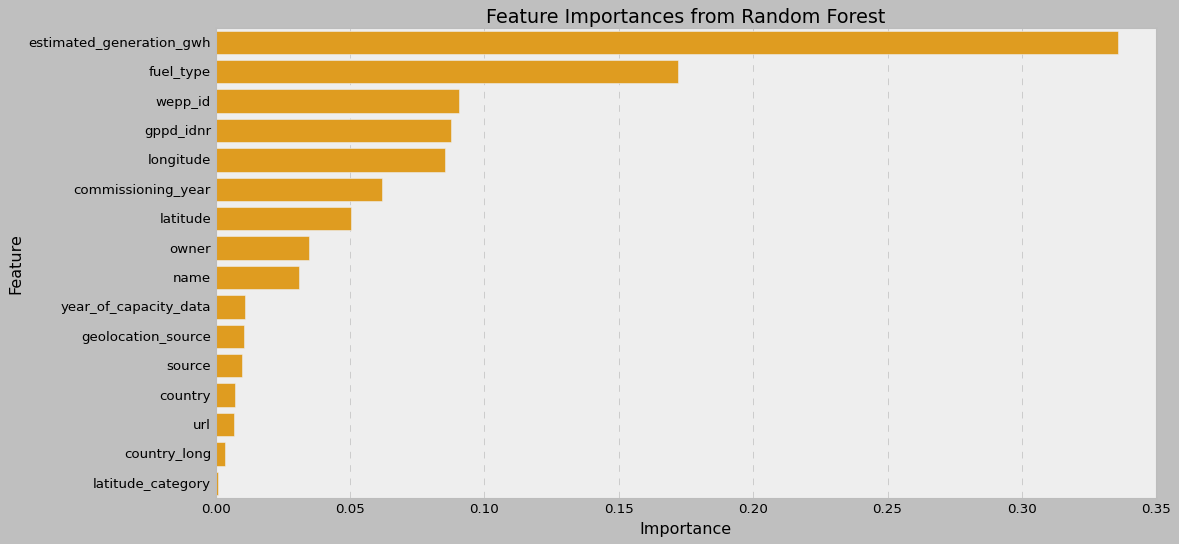

In [152]:
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='orange')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.show()

<a id='10'></a>
## <span style="color:#008080">10. <strong>Feature Scaling</strong></span> 

In [154]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<a id='11'></a>
## <span style="color:#008080">11. <strong>ML Model Building</strong></span> 

In [155]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGBoost Regressor': xgb.XGBRegressor()
}

<a id='12'></a>
## <span style="color:#008080">12. <strong>Model Evaluation</strong></span> 

In [156]:
# Train and test models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Store results
    results[model_name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

# Display the evaluation results
results_df = pd.DataFrame(results).T
results_df

,R2 Score,MSE,RMSE,MAE
Linear Regression,0.452640,10772.833117,103.792259,79.347952
Decision Tree Regressor,0.561417,8631.944282,92.908257,42.775816
Random Forest Regressor,0.769261,4541.280859,67.389026,37.332207
Gradient Boosting Regressor,0.680529,6287.659930,79.294766,51.771499
XGBoost Regressor,0.760304,4717.567206,68.684549,41.148024


#### Random Forest Regressor shows the highest R² Score. So, this model can be considered the best model.
* Select the model with the highest R² score (closer to 1 is better).
* Select the model with the lowest error values (lower values indicate better performance).
* R² Score is a good indicator of the overall model performance.

<a id='13'></a>
## <span style="color:#008080">13. <strong>Hyperparameter Tuning</strong></span> 

In [157]:
# Hyperparameter tuning for Random Forest :
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=models['Random Forest Regressor'], param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


## **Model Evaluation after Hyperparameter Tuning**

In [158]:
# Train and test models
results_after = {}
for model_name, model in models.items():
    if model_name == 'Random Forest Regressor':
        model = best_rf
    else:
        model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Store results
    results_after[model_name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
    }

results_after_df = pd.DataFrame(results_after).T
results_after_df

,R2 Score,MSE
Linear Regression,0.452640,10772.833117
Decision Tree Regressor,0.579471,8276.615642
Random Forest Regressor,0.736491,5186.245299
Gradient Boosting Regressor,0.680529,6287.658740
XGBoost Regressor,0.760304,4717.567206


#### After Hyperparameter tuning, model performance has improved. Now, XG Boost Regressor shows the highest R² Score.

<a id='08'></a>
## **Identifying the Best Model for the Dataset**

In [159]:
best_model_name = results_after_df['R2 Score'].idxmax()
print(f"The best performing model is: {best_model_name}")

The best performing model is: XGBoost Regressor


<a id='14'></a>
## <span style="color:#008080">14. <strong>Saving The Model</strong></span> 

In [160]:
model.save_model('xgboost_model.json')

<a id='15'></a>
## <span style="color:#008080">15. <strong>Test With Unseen Data</strong></span> 

In [161]:
# Load the model
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('xgboost_model.json')

In [162]:
# Created a DataFrame with the selected features from feature selection
unseen_data = pd.read_csv("unseen.csv")

unseen_data.head()

,country,country_long,name,gppd_idnr,latitude,longitude,fuel_type,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,estimated_generation_gwh,latitude_category
0,USA,United States of America,Sly Creek,USA0000776,39.5804,-121.1195,Hydro,1983,South Feather Water and Power Agency,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,29170.0,2017,81.193346,Northern Hemisphere
1,DZA,Algeria,Annaba,WRI1023795,36.8924,7.7634,Gas,2010,SociÃ©tÃ© AlgÃ©rienne de Production de lâ€™Ele...,Arab Union of Electricity,http://www.auptde.org/NewsDetails.aspx?lang=en...,GEODB,1029479.0,0,201.713852,Northern Hemisphere
2,USA,United States of America,Ayers Island,USA0002355,43.5978,-71.7177,Hydro,1947,Public Service Co of NH,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,30816.0,2017,81.193346,Northern Hemisphere
3,IND,India,LIGANAMAKKI,IND0000232,14.1704,74.8388,Hydro,1979,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1020555.0,2018,81.193346,Northern Hemisphere
4,IND,India,LOWER SILERU,IND0000240,17.8608,81.6814,Hydro,1976,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1010147.0,2018,81.193346,Northern Hemisphere


In [163]:
unseen_data.shape

(50, 16)

#### We can encode the object columns to numeric values using LabelEncoder.

In [164]:
cate_cols=unseen_data.select_dtypes(include=['object']).columns

# Convert categorical columns using LabelEncoder
for column in cate_cols:
    if unseen_data[column].dtype == 'object':
        le = LabelEncoder()
        unseen_data[column] = le.fit_transform(unseen_data[column])

unseen_data.head()

,country,country_long,name,gppd_idnr,latitude,longitude,fuel_type,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,estimated_generation_gwh,latitude_category
0,6,6,44,20,39.5804,-121.1195,3,1983,22,9,5,8,29170.0,2017,81.193346,0
1,3,0,12,44,36.8924,7.7634,2,2010,20,1,2,3,1029479.0,0,201.713852,0
2,6,6,14,21,43.5978,-71.7177,3,1947,19,9,5,8,30816.0,2017,81.193346,0
3,4,4,30,11,14.1704,74.8388,3,1979,26,2,4,9,1020555.0,2018,81.193346,0
4,4,4,36,17,17.8608,81.6814,3,1976,26,2,4,9,1010147.0,2018,81.193346,0


### Pipeline Implementation

In [ ]:
# Make predictions : 
predictions = model.predict(unseen_data)

predictions

#### These are the predicted capacities.

<a id='16'></a>
## <span style="color:#008080">16. <strong>Conclusion</strong></span> 

### 
**This project provided a comprehensive analysis of global power plant energy generation, revealing valuable insights into capacity patterns of powerplants across regions. The model demonstrated good predictive accuracy for powerplant capacity and identified key trends that could inform energy policy and investment.**

**Limitations of the Dataset** : A key challenge in this project was managing data quality issues, including a significant number of missing values, NaNs, and outliers. 
For example, generation capacity data for some power plants was either incomplete or NaNs, which required careful imputation. Despite these challenges, data preprocessing steps ensured the model retained accuracy and robustness.

<a id='17'></a>
## <span style="color:#008080">17. <strong>Future Works</strong></span> 

#### 
* **Enhance Model Performance and Robustness** : Incorporate Additional Features related to environmental conditions like temperature, rainfall etc. to capture more factors influencing power generation. Experimenting with advanced machine learning models, such as Time-series forecasting methods for predicting energy generation over time also works best.
* **Geospatial Analysis** : Since power plants are geographically distributed, geospatial analyses using location-based features like cities, rivers, or ports could reveal insights into regional factors affecting power generation.
* **Develop a Real-Time Dashboard or Monitoring System** : Creating a real-time or interactive dashboard could provide stakeholders with up-to-date insights into power generation trends, supporting data-driven decision-making in energy management.
* **Collect and Utilize More Data** : Additional data sources could improve model reliability and make predictions applicable to a broader regions. This can help in studying areas with energy surpluses or shortages, aiding in effective resource allocation.